Question 1
 Perform Exploratory data analysis. (20)
- What can you conclude from methods of central tendency and deviation of
the variables?
- Are there any correlated variables?
- Interpret the skewness of the variables.


In [1]:
# Load the data
import pandas as pd
data = pd.read_csv("cancer.csv")
data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [2]:
# Summary Statistics
data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


The table above illustrates the  measure of central tendency statistic mean.The mean value for age is 52.531148, Year is 62.849180, Auxillary nodes is 4.036066 and  Survival is 1.265574. Each mean value represents the center point of the dataset.
Standard deviation values above illustrates  the average distance between the data set and the mean. The survival variable has a low standard deviation of 0.442364 which indicates that the data points are close to the mean whereas Age has a high standard deviation of 10.744024 which indicates that the data points are spread out over a large range of values. 

<AxesSubplot:>

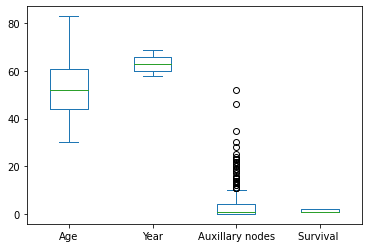

In [3]:
# Box plot
data.plot.box()


<AxesSubplot:>

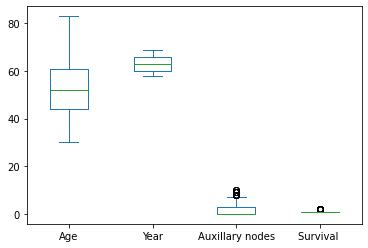

In [4]:
# Removing Outliers

# Max = 75% + 1.5* (75% - 25%)
Maximum = 4 + 1.5 * (4 - 0)
new_data = data[data["Auxillary nodes"] <= Maximum]
new_data.plot.box()

In [5]:
# Correlation
corr = new_data.corr()
corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


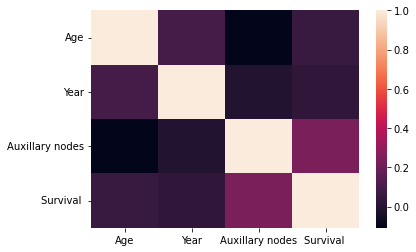

In [6]:
# Visualization - correlation
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr)
plt.show()


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

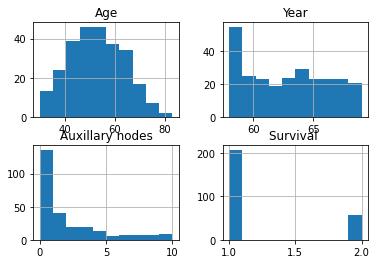

In [7]:
# Skewness
new_data.hist()

C:\Users\Ucheee\AppData\Local\Temp/ipykernel_19268/1529934886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Year"] = new_data["Year"]**(0.5)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

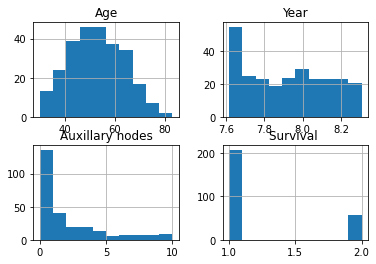

In [8]:
#Removing Skewness
new_data["Year"] = new_data["Year"]**(0.5)
new_data.hist()

In [9]:
# Standardization and Normalization - Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(new_data)
scaled = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled, columns = new_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,-2.078151,-0.246077,0.507659,-0.529333
1,-2.078151,0.669605,-0.672425,-0.529333
2,-1.986534,-1.184194,0.114297,-0.529333
3,-1.986534,0.669605,0.901020,-0.529333
4,-1.803300,-1.502178,3.261188,-0.529333
...,...,...,...,...
260,2.044615,-0.246077,-0.279064,-0.529333
261,2.136233,1.268362,-0.672425,-0.529333
262,2.227850,0.669605,0.507659,-0.529333
263,2.319467,0.669605,-0.279064,1.889171


In [10]:
# Save to .csv
new_data.to_csv("new_data.csv")

In [11]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [10]:
# Import data

data = pd.read_csv("new_data.csv")

# Create features/inputs
X = data.drop(columns = ["Survival "])

# Create the output/class
y = data["Survival "]

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

data

,Unnamed: 0,Age,Year,Auxillary nodes,Survival
0,0,30,62,3,1
1,1,30,65,0,1
2,2,31,59,2,1
3,3,31,65,4,1
4,4,33,58,10,1
...,...,...,...,...,...
260,300,75,62,1,1
261,301,76,67,0,1
262,302,77,65,3,1
263,303,78,65,1,2


In [12]:
# Logistic Regression

# Defining and training the model
clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)

# Evaluating the model 
clf.score(X_test, y_test)

# Making predictions
y_pred = clf.predict(X_test)

# Creating the labels
labels = ["authentic", "forged"]

# Developing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()

NameError: name 'X_train' is not defined

              precision    recall  f1-score   support

           1       0.72      0.90      0.80        78
           2       0.11      0.04      0.05        28

    accuracy                           0.67       106
   macro avg       0.42      0.47      0.43       106
weighted avg       0.56      0.67      0.60       106



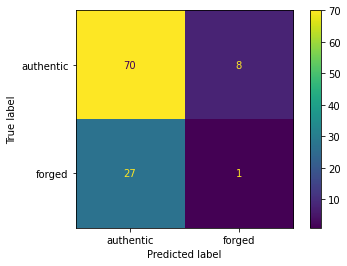

In [12]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

In [13]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

NameError: name 'X_train' is not defined

              precision    recall  f1-score   support

           1       0.78      0.87      0.82        78
           2       0.47      0.32      0.38        28

    accuracy                           0.73       106
   macro avg       0.63      0.60      0.60       106
weighted avg       0.70      0.73      0.71       106



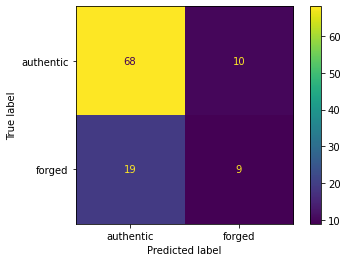

In [14]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'adam', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "identity", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))

In [15]:
# Implement k-fold cross validation for Logistic Regression

# Specify the number of splits - 10
kf = KFold(n_splits=10)

Total = []

iteration = 1
for train_indices, test_indices in kf.split(x_train): 
    clf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration " + str(iteration) + " is " + str(clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    Total.append(clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
print(accuracy)

lr_average = sum(Total)/len(Total)
print(lr_average)

NameError: name 'x_train' is not defined

In [ ]:
# Implement k-fold cross validation for Random Forest

# Specify the number of splits - 10
Total = []

iteration = 1
for train_indices, test_indices in kf.split(x_train): 
    rf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration " + str(iteration) + " is " + str(rf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    Total.append(rf.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
print(Total)

rf_avrg = sum(Total)/len(Total)
print(rf_avrg)

In [ ]:
# Implement k-fold cross validation for Support Vector Machine
kf = KFold(n_splits=10)

Total = []

iteration = 1
for train_indices, test_indices in kf.split(x_train): 
    svm.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration " + str(iteration) + " is " + str(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    accuracy.append(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
print(Total)

svm_average = sum(Total)/len(Total)
print(svm_average)

In [ ]:
# Implement k-fold cross validation for Neural Network
kf = KFold(n_splits=10)
Total = []

iteration = 1
for train_indices, test_indices in kf.split(x_train): 
    nn.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration " + str(iteration) + " is " + str(nn.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    Total.append(nn.score(x_train.iloc[test_indices], y_train.iloc[test_indices]))
    iteration += 1
    
print(Total)

nn_avrg = sum(Total)/len(Total)
print(nn_avrg)

In [17]:
# Implement grid search for parameter tuning of Logistic Regression

parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),'penalty': ('none','l1','l2', 'elasticnet'), 'C':[100, 10, 1.0, 0.1, 0.01]}

clf_grid = GridSearchCV(clf, parameters)
clf_grid.fit(X_train, y_train)
clf_grid.best_params_

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting 

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting 

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. T

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting 

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting 

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\model_sel

C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ucheee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which

{'C': 100, 'penalty': 'none', 'solver': 'sag'}

In [ ]:
# Implement grid search for parameter tuning of Random Forest
parameters = {'max_features':('sqrt', 'log2'), 'n_estimators':[10,100,1000],'max_depth':[1,2,3,4,5,6,7,8,9]}

rf_grid = GridSearchCV(rf,parameters)
rf_grid.fit(x_train,y_train)
rf_grid.best_params_

In [ ]:
# Implement grid search for parameter tuning of Support Vector Machine


parameters = {'kernel':('linear', 'rbf'), 'C':[1,10]}

svm_grid = GridSearchCV(svm,parameters)
svm_grid.fit(x_train,y_train)
svm_grid.best_params_

In [ ]:
# Implement grid search for parameter tuning of Neural Network
parameters = {'solver':('lbfgs','sgd','adam'), 'learning_rate':('constant','invscaling','adaptive'), 'activation':('identity','logistic','tanh','relu')}

nn_grid = GridSearchCV(nn,parameters)
nn_grid.fit(x_train,y_train)
nn_grid.best_params_

In [ ]:
clf.score(x_test, y_test)


In [ ]:
rf.score(x_test, y_test)